# Checking the spatio-temporal build up of the largest simulated events

In this notebook we will compare the UNSEEN data to the observations.  

In [2]:
##Load pacakages
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy
import cartopy.crs as ccrs
import pandas as pd
import calendar

In [3]:
##This is so variables get printed within jupyter
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

In [4]:
### Load Data
dirname = r'/home/tike/'


### Observed

In [5]:
Observations_pooled_monthly = xr.open_dataarray('../Data/Observations_pooled_monthly.nc')
Observations_pooled_monthly

<xarray.DataArray 'Streamflow' (index: 360)>
array([ 96820.165677, 110682.521733, 125771.958613, ..., 217669.384226,
       182610.150774, 121367.412367])
Coordinates:
  * index    (index) datetime64[ns] 1980-10-31 1980-11-30 ... 2010-09-30

### UNSEEN

In [6]:
Amazon_simulated = xr.open_dataset(dirname + 'Discharge/discharge_monthAvg_presentDay.nc')  #The data from Niko
Amazon_simulated  #to show

Amazon = Amazon_simulated['discharge'].sel(lon=-51.75, lat=-1.25)  ## Select the timeseries in the gridcell at the mouth of the river
Obidos = Amazon_simulated['discharge'].sel(lon=-55.75,lat=-2.25)  ## At the most downstream station of the main Amazon river at Obidos
Tapajos = Amazon_simulated['discharge'].sel(lon=-55.25, lat=-2.75) ## At the mouth of the southern tributary Tapajos
Xingu = Amazon_simulated['discharge'].sel(lon=-52.25, lat=-1.75)   ## Select the timeseries in the gridcell at the mouth of the river

/home/tike/miniconda3/envs/exp/lib/python3.8/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/home/tike/miniconda3/envs/exp/lib/python3.8/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


<xarray.Dataset>
Dimensions:    (lat: 44, lon: 70, time: 24000)
Coordinates:
  * time       (time) object 0001-01-03 00:00:00 ... 2055-01-01 00:00:00
  * lat        (lat) float32 4.75 4.25 3.75 3.25 ... -15.25 -15.75 -16.25 -16.75
  * lon        (lon) float32 -79.75 -79.25 -78.75 ... -46.25 -45.75 -45.25
Data variables:
    discharge  (time, lat, lon) float32 ...

## The temporal characteristics of the floods

Now we will compare the flood seasonality between UNSEEN simulations and the observations. We plot the 2, 20 and 2000 year monthly flood values for UNSEEN and the 2, 20 and 52 year values for the observations. 

The plot shows that there are large UNSEEN floods in July-September, that are not seen in the observations. 

In [7]:
##Create a time array for indexing the time dimension
#The time axis is currently from 0:2000, I will change them to their original years 2035-2040 (copied from the precipitation dataset). 
# The runs are five years long, repeated 400 times (16 starts x 25 ensembles). 
# Time_year represents one run, that should be repeated 400 times to match the time dimension. 
time_year=np.arange('2035-01', '2040-01', dtype='datetime64[M]')
time_year

array(['2035-01', '2035-02', '2035-03', '2035-04', '2035-05', '2035-06',
       '2035-07', '2035-08', '2035-09', '2035-10', '2035-11', '2035-12',
       '2036-01', '2036-02', '2036-03', '2036-04', '2036-05', '2036-06',
       '2036-07', '2036-08', '2036-09', '2036-10', '2036-11', '2036-12',
       '2037-01', '2037-02', '2037-03', '2037-04', '2037-05', '2037-06',
       '2037-07', '2037-08', '2037-09', '2037-10', '2037-11', '2037-12',
       '2038-01', '2038-02', '2038-03', '2038-04', '2038-05', '2038-06',
       '2038-07', '2038-08', '2038-09', '2038-10', '2038-11', '2038-12',
       '2039-01', '2039-02', '2039-03', '2039-04', '2039-05', '2039-06',
       '2039-07', '2039-08', '2039-09', '2039-10', '2039-11', '2039-12'],
      dtype='datetime64[M]')

In [8]:
### Set extent and projection
plt.rcParams["font.family"] = "sans-serif" ##change font
plt.rcParams['font.size'] = 7  ## change font size (6 was used below)
plt.rcParams['svg.fonttype'] = 'none' ## so inkscape recognized texts in svg file
plt.rcParams['pdf.fonttype'] = 42 ## so illustrator can recognize text

Text(0, 0.5, 'Discharge [m3/s]')

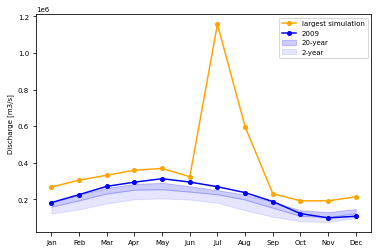

In [10]:
# plt.figure(figsize=(90/25.4, 40/25.4))
ax = plt.axes()
Quantiles_obs = Observations_pooled_monthly.groupby("index.month").quantile([0,1-1/2, 1-1/20, 1], dim="index")
ax.fill_between(list(calendar.month_abbr[1:]), Quantiles_obs.sel(quantile=1-1/2), Quantiles_obs.sel(quantile=1-1/20), color='blue', alpha=0.2,label = '20-year')
ax.fill_between(list(calendar.month_abbr[1:]), Quantiles_obs.sel(quantile=0), Quantiles_obs.sel(quantile=1-1/2), color='blue', alpha=0.1,label = '2-year')

plt.plot(list(calendar.month_abbr[1:]),
         Amazon.assign_coords(
             time=np.tile(time_year, 400)).isel(
             time=slice(1567 * 12, 1568 * 12)
         ).values,
         marker='o',
         markersize = 4,
         label='largest simulation',
         color='orange'
        )

plt.plot(list(calendar.month_abbr[1:]),
         Observations_pooled_monthly.sel(
             index=slice('2009', '2009-12')
         ).values,
         marker='o',
         markersize = 4,
         label='2009',
         color='blue'
        )

plt.ylabel('Discharge [m3/s]')
plt.legend()
# plt.savefig('../Graphs/paper/Discharge_temporal_obs_flood1.pdf',bbox_inches='tight', dpi =300)       

## The spatial characteristics

For the spatial characteristics, we first plot the streamflow for the entire basin in % of the flood, for each month of the year preceding the flood. The index for the flood is selected [here](1.Describe_floods/1.1When_did_the_Mega-floods_occur.ipynb).  

In [18]:
##Flood1
Amazon_discharge_all_months_flood1 = Amazon_simulated.assign_coords(time=np.tile(time_year,400)).isel(time=slice(1566*12,1568*12))
Amazon_discharge_all_months_flood1_normalized_toflood = Amazon_discharge_all_months_flood1/ Amazon_discharge_all_months_flood1.sel(time='2037-07-01',lon=-51.75, lat=-1.25) *100
Amazon_discharge_all_months_flood1.sel(time='2037-07-01',lon=-51.75, lat=-1.25)
Amazon_discharge_all_months_flood1

<xarray.Dataset>
Dimensions:    ()
Coordinates:
    time       datetime64[ns] 2037-07-01
    lat        float32 -1.25
    lon        float32 -51.75
Data variables:
    discharge  float32 ...

<xarray.Dataset>
Dimensions:    (lat: 44, lon: 70, time: 24)
Coordinates:
  * time       (time) datetime64[ns] 2036-01-01 2036-02-01 ... 2037-12-01
  * lat        (lat) float32 4.75 4.25 3.75 3.25 ... -15.25 -15.75 -16.25 -16.75
  * lon        (lon) float32 -79.75 -79.25 -78.75 ... -46.25 -45.75 -45.25
Data variables:
    discharge  (time, lat, lon) float32 ...

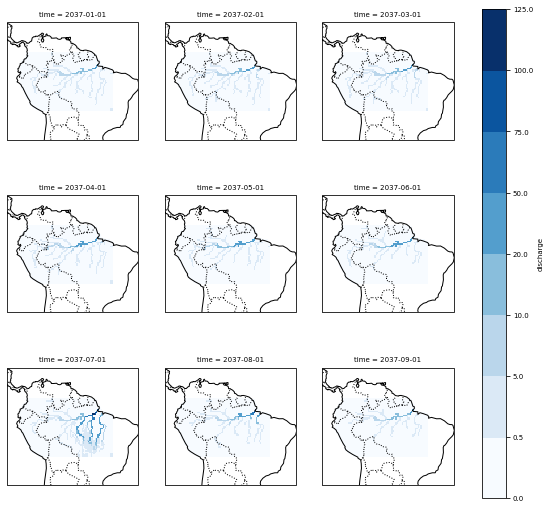

In [24]:
extent = [-85, -35, 15, -25]
levels = [0, 0.5, 5, 10, 20, 50, 75,100,125]
# g_simple=Amazon_discharge_all_months_flood1_normalized['discharge'].sel(time=slice('2036-11-16T12:00:00.000000000','2037-11-16T00:00:00.000000000')).plot(transform=ccrs.PlateCarree(),levels=levels,cmap=plt.cm.Blues, col='time', col_wrap=3,subplot_kws={'projection': ccrs.Mercator()})  #,cmap=plt.cm.Blues,
g_simple=Amazon_discharge_all_months_flood1_normalized_toflood['discharge'].sel(time=slice('2037-01','2037-09')).plot(transform=ccrs.PlateCarree(),cmap=plt.cm.Blues, levels=levels, col='time', col_wrap=3,subplot_kws={'projection': ccrs.Mercator()})  #,cmap=plt.cm.Blues,

for ax in g_simple.axes.flat:
    ax.set_extent(extent)
    ax.coastlines(resolution='110m')
    ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
#     ax.gridlines()
    
plt.draw()
plt.savefig('../Graphs/Discharge_spatial_flood1.png',bbox_inches='tight',dpi =300)

We then look at the streamflow at a few locations within the Amazon catchment during the highest streamflow simulation within the model experiments.

For the largest flood:

Text(0.5, 1.0, '')

Text(0.5, 0, '')

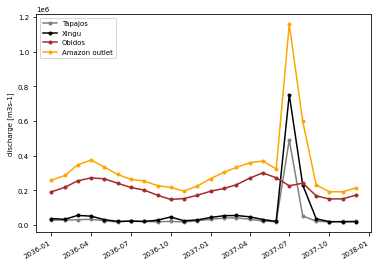

In [11]:
# plt.figure(figsize=(90/25.4, 40/25.4))

Tapajos.assign_coords(
    time=np.tile(time_year, 400)).isel(                          ## Not very neat, but here we assign the time_year, repeated 400 times.
    time=slice(1566 * 12, 1568 * 12)).plot.line(marker='o',      ## And then we can select the index of the highest flood and plot a line
                                                markersize= 3,
                                                label='Tapajos',
                                                color='grey')
  
Xingu.assign_coords(                                             ## Same for Xingu
    time=np.tile(time_year, 400)).isel(    
    time=slice(1566 * 12, 1568 * 12)).plot.line(marker='o',
                                                markersize = 3,
                                                label='Xingu',
                                                color='black')  
Obidos.assign_coords(                                             ## Same for Xingu
    time=np.tile(time_year, 400)).isel(    
    time=slice(1566 * 12, 1568 * 12)).plot.line(marker='o',
                                                markersize = 3,
                                                label='Obidos',
                                                color='brown')  
Amazon.assign_coords(
    time=np.tile(time_year, 400)).isel(                          ## And the Amazon mouth.
    time=slice(1566 * 12, 1568 * 12)).plot.line(marker='o',
                                                markersize = 3,
                                                label='Amazon outlet',
                                                color='orange') 
plt.legend()
plt.title("")
plt.xlabel("")
plt.draw()
# plt.savefig('../Graphs/paper/Discharge_spatial_flood1.pdf',bbox_inches='tight',dpi =300)

And the second largest flood:

Text(0.5, 1.0, '')

Text(0.5, 0, '')

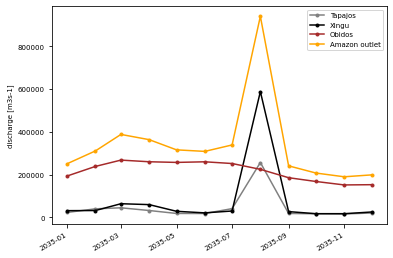

In [14]:
# plt.figure(figsize=(90/25.4, 40/25.4))

Tapajos.assign_coords(
    time=np.tile(time_year, 400)).isel(                          ## Not very neat, but here we assign the time_year, repeated 400 times.
    time=slice(1730 * 12, 1731 * 12)).plot.line(marker='o',      ## And then we can select the index of the highest flood and plot a line
                                                markersize= 3,
                                                label='Tapajos',
                                                color='grey')
  
Xingu.assign_coords(                                             ## Same for Xingu
    time=np.tile(time_year, 400)).isel(    
    time=slice(1730 * 12, 1731 * 12)).plot.line(marker='o',
                                                markersize = 3,
                                                label='Xingu',
                                                color='black')  
Obidos.assign_coords(                                             ## Same for Xingu
    time=np.tile(time_year, 400)).isel(    
    time=slice(1730 * 12, 1731 * 12)).plot.line(marker='o',
                                                markersize = 3,
                                                label='Obidos',
                                                color='brown')  
Amazon.assign_coords(
    time=np.tile(time_year, 400)).isel(                          ## And the Amazon mouth.
    time=slice(1730 * 12, 1731 * 12)).plot.line(marker='o',
                                                markersize = 3,
                                                label='Amazon outlet',
                                                color='orange') 
plt.legend()
plt.title("")
plt.xlabel("")
plt.draw()
# plt.savefig('../Graphs/paper/Discharge_spatial_flood2.png',bbox_inches='tight',dpi =300)